# Image Mask Example

/home/pybokeh/envs/jupyter/lib/python3.5/site-packages/wordcloud/wordcloud.py:286: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


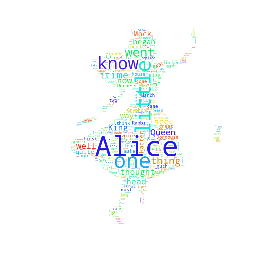

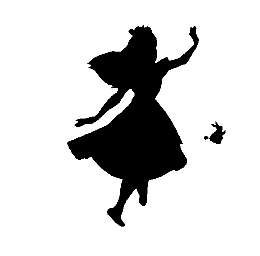

In [1]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = imread(path.join(d, "alice_mask.png"), flatten=True)
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
stopwords=STOPWORDS.add("said"))
# generate word cloud
wc.generate(text)
# store to file
wc.to_file(path.join(d, "alice.png"))
# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

# Simple Example

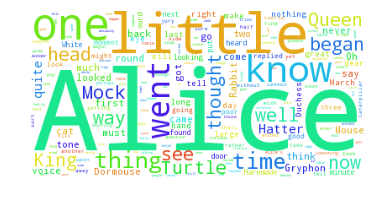

In [2]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()
wordcloud = WordCloud(background_color='white').generate(text)

wordcloud.to_file('/home/pybokeh/Downloads/simple.png')

# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
wordcloud.font_path

'/usr/share/fonts/truetype/droid/DroidSansMono.ttf'

### How to render an image inline using PIL/PIllow

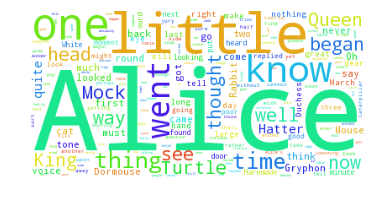

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


pil_im = Image.open('/home/pybokeh/Downloads/simple.png', 'r')
plt.axis("off")
plt.imshow(np.asarray(pil_im))
fig = plt.gcf()
#fig.set_size_inches(10,10)
plt.show()